<a href="https://colab.research.google.com/github/dhamu2908/DA6401-Assignment1/blob/main/DL_Assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DL Assignment**

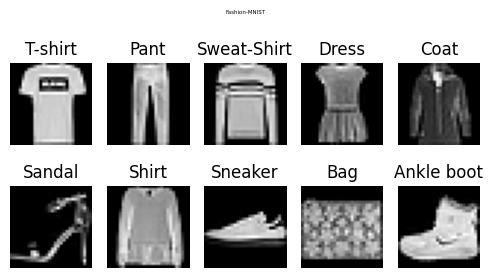

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class labels
class_labels = [
    "T-shirt", "Pant", "Sweat-Shirt", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Select one image per class
sample_images = []
for i in range(10):
    index = np.where(y_train == i)[0][0]
    sample_images.append(x_train[index])

# Plot images in a grid
fig, axes = plt.subplots(2, 5, figsize=(5, 3))
fig.suptitle("Fashion-MNIST", fontsize=4)

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i], cmap='gray')
    ax.set_title(class_labels[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


**Question 2**

In [7]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize input images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convert labels to one-hot encoding
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_test)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Initialize weights and biases
def initialize_parameters(input_size, hidden_layers, output_size):
    np.random.seed(42)
    layers = [input_size] + hidden_layers + [output_size]
    parameters = {}

    for i in range(1, len(layers)):
        parameters[f'W{i}'] = np.random.randn(layers[i-1], layers[i]) * 0.01
        parameters[f'b{i}'] = np.zeros((1, layers[i]))

    return parameters

# Forward propagation
def forward_propagation(X, parameters):
    cache = {'A0': X}
    L = len(parameters) // 2

    for i in range(1, L):
        Z = np.dot(cache[f'A{i-1}'], parameters[f'W{i}']) + parameters[f'b{i}']
        cache[f'A{i}'] = sigmoid(Z)

    ZL = np.dot(cache[f'A{L-1}'], parameters[f'W{L}']) + parameters[f'b{L}']
    cache[f'A{L}'] = softmax(ZL)

    return cache

# Compute loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

# Backpropagation
def backward_propagation(y_true, cache, parameters, learning_rate=0.01):
    L = len(parameters) // 2
    m = y_true.shape[0]
    grads = {}

    dZL = cache[f'A{L}'] - y_true
    grads[f'dW{L}'] = np.dot(cache[f'A{L-1}'].T, dZL) / m
    grads[f'db{L}'] = np.sum(dZL, axis=0, keepdims=True) / m

    for i in range(L-1, 0, -1):
        dA = np.dot(dZL, parameters[f'W{i+1}'].T)
        dZ = dA * (cache[f'A{i}'] * (1 - cache[f'A{i}']))
        grads[f'dW{i}'] = np.dot(cache[f'A{i-1}'].T, dZ) / m
        grads[f'db{i}'] = np.sum(dZ, axis=0, keepdims=True) / m
        dZL = dZ

    for i in range(1, L+1):
        parameters[f'W{i}'] -= learning_rate * grads[f'dW{i}']
        parameters[f'b{i}'] -= learning_rate * grads[f'db{i}']

    return parameters

# Train the model
def train_model(X_train, y_train, hidden_layers, epochs=10, batch_size=32, learning_rate=0.01):
    parameters = initialize_parameters(X_train.shape[1], hidden_layers, 10)
    m = X_train.shape[0]

    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            cache = forward_propagation(X_batch, parameters)
            parameters = backward_propagation(y_batch, cache, parameters, learning_rate)

        if epoch % 2 == 0:
            train_pred = forward_propagation(X_train, parameters)[f'A{len(hidden_layers)+1}']
            loss = compute_loss(y_train, train_pred)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters

# Train the neural network
hidden_layers = [128, 64]  # Example: 2 hidden layers
parameters = train_model(x_train, y_train_onehot, hidden_layers, epochs=10, batch_size=64, learning_rate=0.01)

# Evaluate accuracy
def predict(X, parameters):
    output = forward_propagation(X, parameters)[f'A{len(parameters)//2}']
    return np.argmax(output, axis=1)

y_pred = predict(x_test, parameters)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 2.3032
Epoch 2, Loss: 2.3032
Epoch 4, Loss: 2.3031
Epoch 6, Loss: 2.3030
Epoch 8, Loss: 2.3028
Test Accuracy: 0.1000


In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import wandb

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize and flatten the data
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# One-hot encode labels
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

# Split training data into training and validation sets
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]

# Neural Network Class
class FeedforwardNeuralNetwork:
    def __init__(self, layer_sizes, activation='relu', weight_init='xavier', weight_decay=0.0):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.weight_init = weight_init
        self.weight_decay = weight_decay
        self.weights = []
        self.biases = []
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(len(self.layer_sizes) - 1):
            if self.weight_init == 'xavier':
                limit = np.sqrt(6 / (self.layer_sizes[i] + self.layer_sizes[i + 1]))
                self.weights.append(np.random.uniform(-limit, limit, (self.layer_sizes[i], self.layer_sizes[i + 1])))
            else:
                self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, self.layer_sizes[i + 1])))

    def forward(self, X):
        self.activations = [X]
        self.z_values = []
        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            if i == len(self.weights) - 1:
                # Softmax for output layer
                exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
                a = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            else:
                if self.activation == 'sigmoid':
                    a = 1 / (1 + np.exp(-z))
                elif self.activation == 'tanh':
                    a = np.tanh(z)
                elif self.activation == 'relu':
                    a = np.maximum(0, z)
            self.activations.append(a)
        return self.activations[-1]

    def backward(self, X, y, learning_rate, optimizer):
        m = X.shape[0]
        gradients_w = [np.zeros_like(w) for w in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]

        # Output layer error
        delta = self.activations[-1] - y
        gradients_w[-1] = np.dot(self.activations[-2].T, delta) / m
        gradients_b[-1] = np.sum(delta, axis=0, keepdims=True) / m

        # Backpropagate the error
        for i in range(len(self.weights) - 2, -1, -1):
            if self.activation == 'sigmoid':
                delta = np.dot(delta, self.weights[i + 1].T) * self.activations[i + 1] * (1 - self.activations[i + 1])
            elif self.activation == 'tanh':
                delta = np.dot(delta, self.weights[i + 1].T) * (1 - self.activations[i + 1] ** 2)
            elif self.activation == 'relu':
                delta = np.dot(delta, self.weights[i + 1].T) * (self.activations[i + 1] > 0)
            gradients_w[i] = np.dot(self.activations[i].T, delta) / m
            gradients_b[i] = np.sum(delta, axis=0, keepdims=True) / m

        # Update weights and biases using the optimizer
        optimizer.update(self.weights, self.biases, gradients_w, gradients_b, learning_rate, self.weight_decay)

# Optimizer Classes
class SGD:
    def update(self, weights, biases, gradients_w, gradients_b, learning_rate, weight_decay):
        for i in range(len(weights)):
            weights[i] -= learning_rate * (gradients_w[i] + weight_decay * weights[i])
            biases[i] -= learning_rate * gradients_b[i]

class Momentum:
    def __init__(self, momentum=0.9):
        self.momentum = momentum
        self.velocity_w = None
        self.velocity_b = None

    def update(self, weights, biases, gradients_w, gradients_b, learning_rate, weight_decay):
        if self.velocity_w is None:
            self.velocity_w = [np.zeros_like(w) for w in weights]
            self.velocity_b = [np.zeros_like(b) for b in biases]
        for i in range(len(weights)):
            self.velocity_w[i] = self.momentum * self.velocity_w[i] + learning_rate * (gradients_w[i] + weight_decay * weights[i])
            self.velocity_b[i] = self.momentum * self.velocity_b[i] + learning_rate * gradients_b[i]
            weights[i] -= self.velocity_w[i]
            biases[i] -= self.velocity_b[i]

# Similarly, implement Nesterov, RMSprop, Adam, and Nadam

# Training Function
def train():
    wandb.init()
    config = wandb.config
    model = FeedforwardNeuralNetwork(
        layer_sizes=[784] + [config.hidden_size] * config.num_hidden_layers + [10],
        activation=config.activation,
        weight_init=config.weight_init,
        weight_decay=config.weight_decay
    )
    optimizer = get_optimizer(config.optimizer)

    for epoch in range(config.epochs):
        for i in range(0, X_train.shape[0], config.batch_size):
            X_batch = X_train[i:i + config.batch_size]
            y_batch = y_train[i:i + config.batch_size]
            model.forward(X_batch)
            model.backward(X_batch, y_batch, config.learning_rate, optimizer)

        # Evaluate on validation set
        val_preds = model.forward(X_val)
        val_loss = -np.mean(np.log(val_preds[np.arange(len(y_val)), np.argmax(y_val, axis=1)]))
        val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(y_val, axis=1))
        wandb.log({"val_loss": val_loss, "val_acc": val_acc})

# Hyperparameter Tuning with WandB
sweep_config = {
    'method': 'bayes',
    'metric': {'name': 'val_acc', 'goal': 'maximize'},
    'parameters': {
        'num_hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']},
        'epochs': {'values': [5, 10]}
    }
}

sweep_id = wandb.sweep(sweep_config, project="fashion-mnist-sweep")
wandb.agent(sweep_id, train)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: